In [ ]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout

In [ ]:
dataset_path='/content/drive/MyDrive/AI in Healthcare/brain-tumor-mri-dataset'


train_dir='/content/drive/MyDrive/AI in Healthcare/brain-tumor-mri-dataset/Training'
test_dir='/content/drive/MyDrive/AI in Healthcare/brain-tumor-mri-dataset/Testing'

categories=['glioma', 'meningioma', 'notumor', 'pituitary']

In [ ]:
train_data=[]

for category in categories:
  folder_path=os.path.join(train_dir,category)
  images=os.listdir(folder_path)
  count=len(images)

  train_data.append(pd.DataFrame({"Image":images, "Category":[category]*count, "Count":[count]*count}))

train_df=pd.concat(train_data, ignore_index=True)


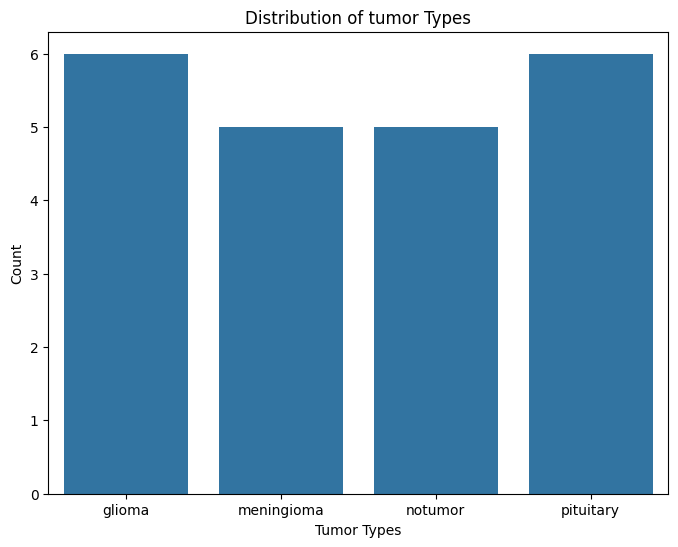

In [ ]:
plt.figure(figsize=(8,6))
sns.barplot(data=train_df,x="Category",y="Count") # Use "Category" and "Count" (capital C)
plt.title("Distribution of tumor Types")
plt.xlabel("Tumor Types")
plt.ylabel("Count")
plt.show()

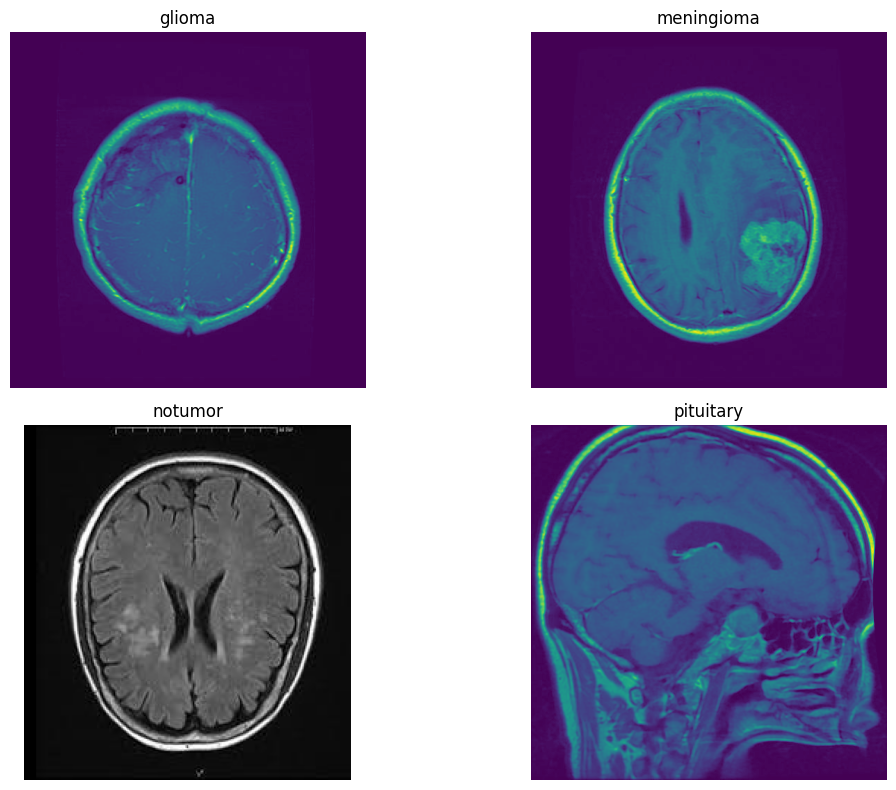

In [ ]:
plt.figure(figsize=(12,8))

for i,category in enumerate(categories):
  folder_path=os.path.join(train_dir,category)
  image_path=os.path.join(folder_path,os.listdir(folder_path)[0])
  img=plt.imread(image_path)
  plt.subplot(2,2,i+1)
  plt.imshow(img)
  plt.title(category)
  plt.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
image_size=(150,150)

batch_size=32
epochs=10

train_datagen=ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [ ]:
train_generator=train_datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)

test_datagen=ImageDataGenerator(rescale=1./255)

test_generator=test_datagen.flow_from_directory(
    test_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

Found 22 images belonging to 4 classes.
Found 23 images belonging to 4 classes.


In [ ]:
model=Sequential([
    Conv2D(32,(3,3),activation='relu', input_shape=(image_size[0],image_size[1],3)),
    MaxPooling2D(2,2),
    Conv2D(64,(3,3),activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128,(3,3),activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128,(3,3),activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(512,activation='relu'),
    Dropout(0.5),
    Dense(4,activation='softmax'),
    Flatten(),
    Dense(512,activation='relu'),
    Dropout(0.5),
    Dense(len(categories),activation="softmax")

])

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
history=model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples//batch_size,
    epochs=epochs,
    validation_data=test_generator,
    validation_steps=test_generator.samples//batch_size
)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1/1 ━━━━━━━━━━━━━━━━━━━━ 13s 13s/step - accuracy: 0.2727 - loss: 1.3836 - val_accuracy: 0.2609 - val_loss: 1.3883
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.3182 - loss: 1.3824 - val_accuracy: 0.2609 - val_loss: 1.3900
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.2727 - loss: 1.3822 - val_accuracy: 0.2609 - val_loss: 1.3898
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.1364 - loss: 1.3859 - val_accuracy: 0.2609 - val_loss: 1.3891
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.3182 - loss: 1.3825 - val_accuracy: 0.2609 - val_loss: 1.3891
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.3182 - loss: 1.3850 - val_accuracy: 0.2609 - val_loss: 1.3890
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.2273 - loss: 1.3986 - val_accuracy: 0.2609 - val_loss: 1.3891
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.3182 - loss: 1.3821 - val_accuracy: 0.2609 - val_loss: 1.3897
Epoch 9/10
1/1 ━━━━━━━━━━